In [8]:

# A while back I was working at an small startup that received hundreds and hundreds of zip files each day. The files had 
# data about stocks traded on exchanges all over the world. Most of the time the files came in with all the correct data, 
# but sometimes there was missing data. Also, all over the world there are all kinds of local holidays in different countries
# and if there is a holiday, there is no stock data generated and transmitted out, and that's what we would expect. 
# However, if we would expect data on a non-holiday date and we received no data, there is a problem!! 

# So, we want to accomplish the following...

# Print the rows of the date, symbol, and price + each dataframe-name (file name) that has missing data in the any of the dynamically created
# dataframes, named after trading exchnages, located around the globe. So, if the date and exchange are missing, and it is not a 
# holiday date + matching exchange name in the MasterDates dataframe, we want to be notified about this, because the date is 
# considered missing in one or more of the 8 exchange dataframes (file name), and this is NOT a legitimate holiday based on the 
# 'MasterDates' holiday dates.
 

In [9]:

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup
import pandas as pd

# Start a new Chrome session
driver = webdriver.Chrome()


# Navigate to the URL
driver.get('https://www.investing.com/holiday-calendar/')

# Give some time for the page to load
time.sleep(3)

# Click the date picker toggle button
date_picker_button = driver.find_element(By.ID, 'datePickerToggleBtn')
date_picker_button.click()

# Give some time for the date picker to appear
time.sleep(2)

# Enter the start date
start_date_input = driver.find_element(By.ID, 'startDate')
start_date_input.clear()
start_date_input.send_keys('01/01/2024')

# Enter the end date
end_date_input = driver.find_element(By.ID, 'endDate')
end_date_input.clear()
end_date_input.send_keys('12/31/2024')

# Click the apply button
apply_button = driver.find_element(By.ID, 'applyBtn')
apply_button.click()

# Give some time for the results to load
time.sleep(5)

# Scroll down in a loop
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load the page
    time.sleep(2)
    
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    if new_height == last_height:
        break
    last_height = new_height


# At this point, all data should be loaded, and we can extract it
# Locate the table body
table_body = driver.find_element(By.TAG_NAME, 'tbody')
rows = table_body.find_elements(By.TAG_NAME, 'tr')

# Initialize variables to keep track of the previous date
previous_date = None

# List to store data
data = []

# Extract data from each row
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    date = cells[0].text
    country = cells[1].text
    exchange = cells[2].text
    holiday = cells[3].text

    # Print date only if it is different from the previous date
    if date:
        previous_date = date
    else:
        date = "   "

    # Append the data to the list
    data.append({
        'Date': date.strip(),
        'Country': country.strip(),
        'Exchange': exchange.strip(),
        'Holiday': holiday.strip()
    })

# Create a DataFrame from the data
MasterDates = pd.DataFrame(data)

# Convert empty strings to NaN
MasterDates.replace('', pd.NA, inplace=True)

# Fill missing dates with forward fill method
MasterDates['Date'].fillna(method='ffill', inplace=True)

# Display the DataFrame
print(MasterDates.head())
print(MasterDates.tail())

    
# Close the driver
driver.quit()


C:\Users\ryan_\AppData\Local\Temp\ipykernel_31252\138014759.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MasterDates['Date'].fillna(method='ffill', inplace=True)
C:\Users\ryan_\AppData\Local\Temp\ipykernel_31252\138014759.py:106: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  MasterDates['Date'].fillna(method='ffill', inplace=True)


           Date     Country                     Exchange         Holiday
0  Jan 01, 2024   Argentina  Buenos Aires Stock Exchange  New Year's Day
1  Jan 01, 2024   Australia        Sydney Stock Exchange  New Year's Day
2  Jan 01, 2024     Austria        Vienna Stock Exchange  New Year's Day
3  Jan 01, 2024     Bahrain       Bahrain Stock Exchange  New Year's Day
4  Jan 01, 2024  Bangladesh         Dhaka Stock Exchange    Bank Holiday
              Date         Country                    Exchange                                Holiday
1303  Dec 31, 2024     Switzerland  Switzerland Stock Exchange                         New Year's Day
1304  Dec 31, 2024        Thailand     Thailand Stock Exchange                         New Year's Day
1305  Dec 31, 2024  United Kingdom              Aquis Exchange  New Year's Day - Early close at 12:30
1306  Dec 31, 2024  United Kingdom       London Stock Exchange  New Year's Day - Early close at 12:30
1307  Dec 31, 2024       Venezuela      Caracas Stoc

In [10]:

# Now we will generate some generic data to represent the data that we used to get from all the trading exchanges around the world.
# Obviously, I can't share any classified/confidential information here, so I am generating generic data to simulate the data that we 
# would actually receive, paired down a bit

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Function to add ordinal suffix to the day
def add_ordinal_suffix(day):
    suffix = 'th' if 11 <= day <= 13 else {1: 'st', 2: 'nd', 3: 'rd'}.get(day % 10, 'th')
    return f"{day}{suffix}"

# Generate a list of weekdays between the beginning of January and the end of March
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 31)
dates = pd.date_range(start_date, end_date, freq='B')  # 'B' frequency excludes weekends

# Define stock symbols
symbols = ['IBM', 'AAPL', 'MSFT', 'SBUX']

# Function to generate fluctuating stock prices
def generate_stock_prices(start_price, num_days):
    prices = [start_price]
    for _ in range(1, num_days):
        change = np.random.uniform(-1.5, 1.5)  # Random price change between -1.5 and 1.5
        prices.append(prices[-1] + change)
    return np.round(prices, 2)

# Generate stock prices for each symbol
prices = {symbol: generate_stock_prices(np.random.uniform(50, 200), len(dates)) for symbol in symbols}

# Create the dataframes with different date formats
date_formats = ['%m-%d-%Y', '%d-%m-%Y', '%m-%d-%y', '%d-%m-%y', '%y-%m-%d', '%y-%d-%m', '%Y-%m-%d', '%Y-%d-%m']
exchange_names = ['Athens_Stock_Exchange', 'Moscow_Stock_Exchange', 'NASDAQ_OMX_Armenia', 'Bulgarian_Stock_Exchange',
                  'KRX_Korea_Exchange', 'Tokyo_Stock_Exchange', 'New_York_Stock_Exchange', 'London_Stock_Exchange']
dataframes = {}

for date_format, exchange_name in zip(date_formats, exchange_names):
    data = []
    for i, date in enumerate(dates):
        for symbol in symbols:
            data.append([date.strftime(date_format), symbol, prices[symbol][i]])
    df = pd.DataFrame(data, columns=['date', 'symbol', 'price'])
    
    # Randomly remove 0, 1, or 2 dates
    num_dates_to_remove = random.choice([0, 1, 2])
    if num_dates_to_remove > 0:
        random_dates_to_remove = random.sample(range(len(dates)), num_dates_to_remove)
        df = df[~df['date'].isin([dates[idx].strftime(date_format) for idx in random_dates_to_remove])]
    
    dataframes[exchange_name] = df

# Assign each dataframe to a variable with its respective name
Athens_Stock_Exchange = dataframes['Athens_Stock_Exchange']
Moscow_Stock_Exchange = dataframes['Moscow_Stock_Exchange']
NASDAQ_OMX_Armenia = dataframes['NASDAQ_OMX_Armenia']
Bulgarian_Stock_Exchange = dataframes['Bulgarian_Stock_Exchange']
KRX_Korea_Exchange = dataframes['KRX_Korea_Exchange']
Tokyo_Stock_Exchange = dataframes['Tokyo_Stock_Exchange']
New_York_Stock_Exchange = dataframes['New_York_Stock_Exchange']
London_Stock_Exchange = dataframes['London_Stock_Exchange']

# Display the first few rows of each dataframe to verify the results
for key, df in dataframes.items():
    print(f"\n{key} dataframe:")
    print(df.head())
    


Athens_Stock_Exchange dataframe:
         date symbol   price
0  01-01-2024    IBM  179.24
1  01-01-2024   AAPL  198.82
2  01-01-2024   MSFT  145.12
3  01-01-2024   SBUX  100.80
4  01-02-2024    IBM  178.21

Moscow_Stock_Exchange dataframe:
         date symbol   price
0  01-01-2024    IBM  179.24
1  01-01-2024   AAPL  198.82
2  01-01-2024   MSFT  145.12
3  01-01-2024   SBUX  100.80
4  02-01-2024    IBM  178.21

NASDAQ_OMX_Armenia dataframe:
       date symbol   price
0  01-01-24    IBM  179.24
1  01-01-24   AAPL  198.82
2  01-01-24   MSFT  145.12
3  01-01-24   SBUX  100.80
4  01-02-24    IBM  178.21

Bulgarian_Stock_Exchange dataframe:
       date symbol   price
0  01-01-24    IBM  179.24
1  01-01-24   AAPL  198.82
2  01-01-24   MSFT  145.12
3  01-01-24   SBUX  100.80
4  02-01-24    IBM  178.21

KRX_Korea_Exchange dataframe:
       date symbol   price
0  24-01-01    IBM  179.24
1  24-01-01   AAPL  198.82
2  24-01-01   MSFT  145.12
3  24-01-01   SBUX  100.80
4  24-01-02    IBM  178.21

In [13]:

# Assuming MasterDates dataframe is already defined with holidays, as described above...

# Function to format dates in the desired format
def format_date(df, date_col, format_str):
    df[date_col] = pd.to_datetime(df[date_col], format=format_str, errors='coerce')
    df['Formatted Date'] = df[date_col].dt.strftime('%A, %B ') + df[date_col].dt.day.apply(add_ordinal_suffix) + df[date_col].dt.strftime(' %Y')
    return df

# Format dates in each dataframe and add a 'Formatted Date' column
for key, df in dataframes.items():
    fmt = date_formats[exchange_names.index(key)]  # Get the date format for the current dataframe
    dataframes[key] = format_date(df, 'date', fmt)

# Format the 'MasterDates' dataframe
MasterDates['Date'] = pd.to_datetime(MasterDates['Date'], format='%A, %B %dth %Y', errors='coerce')
MasterDates['Formatted Date'] = MasterDates['Date'].dt.strftime('%A, %B ') + MasterDates['Date'].dt.day.apply(add_ordinal_suffix) + MasterDates['Date'].dt.strftime(' %Y')

# Function to find missing dates and print the details
def find_and_print_missing_dates(df, master_df, exchange):
    # Filter MasterDates for the relevant exchange
    master_filtered = master_df[master_df['Exchange'] == exchange]
    
    # Get holidays for the exchange
    holidays = master_filtered['Formatted Date'].values
    
    # Get the formatted dates from the dataframe
    df_dates = set(df['Formatted Date'])
    
    # Find missing dates
    missing_dates = []
    for date in dates:
        formatted_date = date.strftime('%A, %B ') + add_ordinal_suffix(date.day) + date.strftime(' %Y')
        if formatted_date not in df_dates and formatted_date not in holidays:
            missing_dates.append(formatted_date)
    
    # Print details of missing dates
    if missing_dates:
        print(f"Missing dates for {exchange}:")
        for date in missing_dates:
            print(f"Date: {date}")
    else:
        print(f"No missing dates for {exchange}.")

# Find and print missing dates for each dataframe
for key, df in dataframes.items():
    find_and_print_missing_dates(df, MasterDates, key)
    

Missing dates for Athens_Stock_Exchange:
Date: Thursday, March 7th 2024
Missing dates for Moscow_Stock_Exchange:
Date: Friday, January 26th 2024
No missing dates for NASDAQ_OMX_Armenia.
No missing dates for Bulgarian_Stock_Exchange.
No missing dates for KRX_Korea_Exchange.
Missing dates for Tokyo_Stock_Exchange:
Date: Thursday, February 1st 2024
Missing dates for New_York_Stock_Exchange:
Date: Thursday, March 28th 2024
No missing dates for London_Stock_Exchange.


In [ ]:

# Let's check the final results and see if everything worked out correctly.


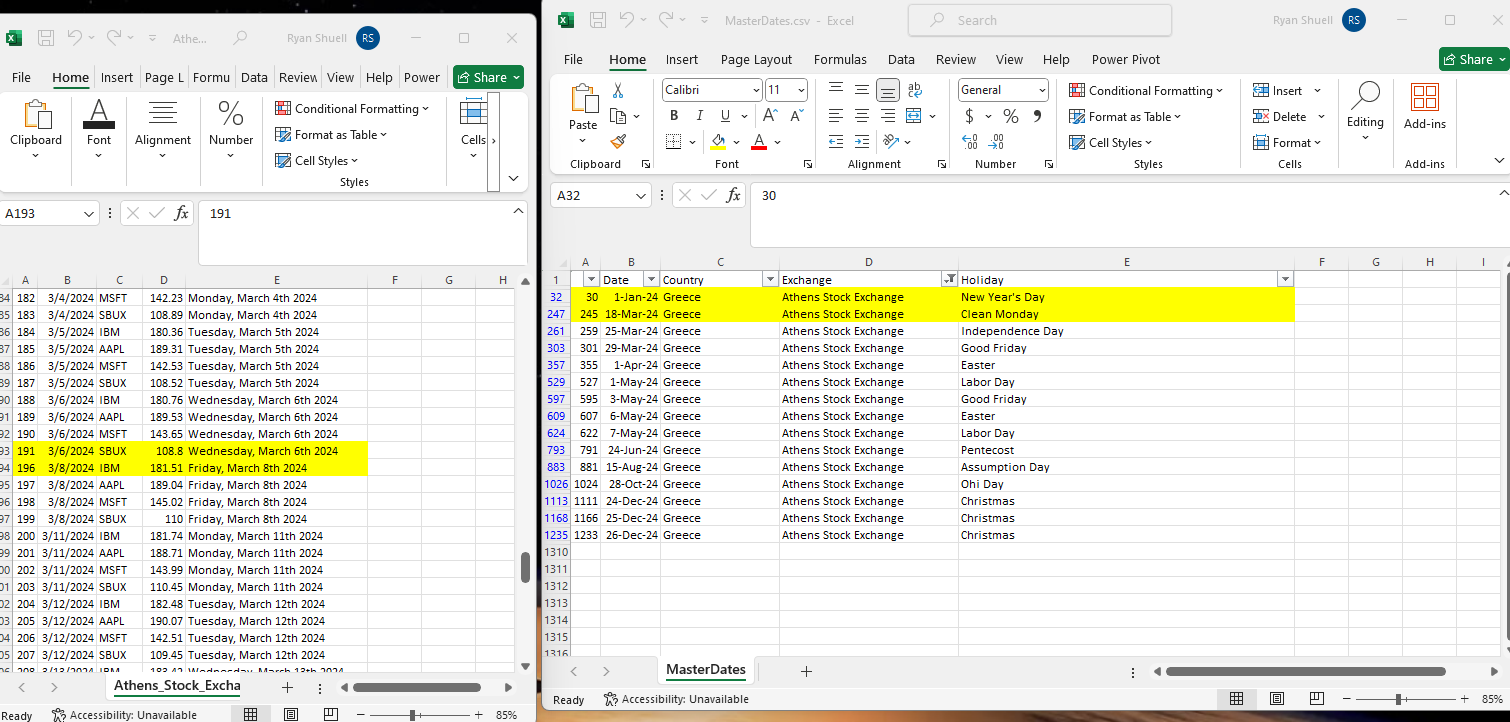

In [18]:

# Missing dates for Athens_Stock_Exchange:
# Date: Thursday, March 7th 2024
             
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "athens.png")


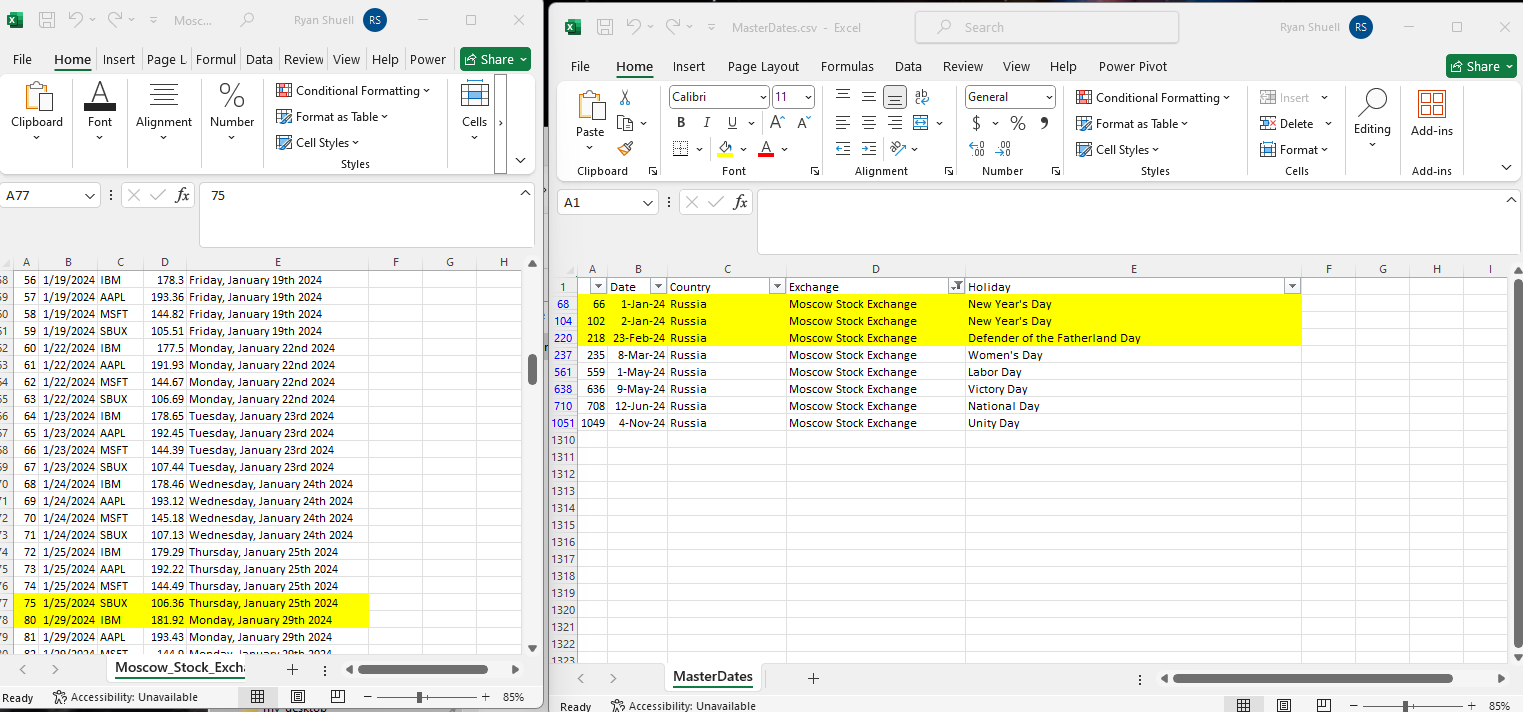

In [19]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "moscow.png")


In [ ]:

# End!!
